# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# As my current numpy version showed as 2.0.2 while checking, I am downgrading to the recommended version which is 1.26.4
!pip install numpy==1.26.4

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries you will be using for analysis
# For data manipulation and numerical operations
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('data/trip_records/2023-1.parquet')
print("Information for the January 2023 dataset:")
df.info()

Information for the January 2023 dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('data/trip_records/')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]
file_list.sort() #sorting the files

# initialise an empty dataframe
df = pd.DataFrame()

print("Starting the sampling process...")

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"--- Processing file: {file_path} ---")

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)

        # Ensuring that the 'tpep_pickup_datetime' is in datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extracting date and hour
        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour



        # We are storing the sampled data for the current month in this df
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['pickup_date'].unique():

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = monthly_data[(monthly_data['pickup_date'] == date) & (monthly_data['pickup_hour'] == hour)]
                # We must check if the hour_data DataFrame is not empty before trying to sample it.
                # If we try to .sample() an empty DataFrame, the program might crash.
                if not hour_data.empty:
                  # Sample 5% of the hourly data randomly
                  sample = hour_data.sample(frac=0.05, random_state=42)
                  # add data of this hour to the dataframe
                  sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier
        print(f"  -> Finished {file_name}. Main 'df' now has {len(df)} rows.")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Starting the sampling process...
--- Processing file: /content/drive/My Drive/My NYC Taxi Project/trip_records/2023-1.parquet ---
  -> Finished 2023-1.parquet. Main 'df' now has 152087 rows.
--- Processing file: /content/drive/MyDrive/My NYC Taxi Project/trip_records/2023-10.parquet ---
  -> Finished 2023-10.parquet. Main 'df' now has 326342 rows.
--- Processing file: /content/drive/MyDrive/My NYC Taxi Project/trip_records/2023-11.parquet ---
  -> Finished 2023-11.parquet. Main 'df' now has 491475 rows.
--- Processing file: /content/drive/MyDrive/My NYC Taxi Project/trip_records/2023-12.parquet ---
  -> Finished 2023-12.parquet. Main 'df' now has 658184 rows.
--- Processing file: /content/drive/MyDrive/My NYC Taxi Project/trip_records/2023-2.parquet ---
  -> Finished 2023-2.parquet. Main 'df' now has 826880 rows.
--- Processing file: /content/drive/MyDrive/My NYC Taxi Project/trip_records/2023-3.parquet ---
  -> Finished 2023-3.parquet. Main 'df' now has 990666 rows.
--- Processing fil

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('nyc_taxi_sampled_data_combined_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet('data/trip_records/nyc_taxi_sampled_data_combined_2023.parquet')

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
# Reseting the DataFrame's index
df.reset_index(drop=True, inplace=True)
# Defining a list of all columns I want to remove
columns_to_remove = ['pickup_date','pickup_hour','store_and_fwd_flag']
# Droping all columns
df = df.drop(columns=columns_to_remove)
# Verifying the changes
print("Successfully dropped unnecessary columns.")
print("Remaining columns:", df.columns.tolist())

Successfully dropped unnecessary columns.
Remaining columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
df['airport_fee_combined'] = df[['airport_fee', 'Airport_fee']].max(axis=1)
df = df.drop(['airport_fee', 'Airport_fee'], axis=1)

# Verifying the result
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_ratecodes = df[df['fare_amount'] < 0]['RatecodeID'].value_counts()

print("Distribution of RatecodeID for trips with negative fare_amount:")
print(negative_fare_ratecodes)

Distribution of RatecodeID for trips with negative fare_amount:
Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values
# Creating a new DataFrame containing only the numeric columns from our main 'df'
numerical_df = df.select_dtypes(include=np.number)
# Checking each column in our numerical DataFrame to see if it contains any negative values
has_any_negatives_mask = (numerical_df < 0).any()
# Filtering this result to get only the columns that returned True
columns_with_negative_values = has_any_negatives_mask[has_any_negatives_mask].index.tolist()

print("Columns containing at least one negative value:")
print(columns_with_negative_values)

Columns containing at least one negative value:
['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']


In [ ]:
# fix these negative values
columns_to_fix = columns_with_negative_values

print(f"Fixing negative values in columns: {columns_to_fix}")

for col in columns_to_fix:
    df[col] = df[col].abs()

print("\nVerification: Checking for negative values after the fix...")
print(df[columns_to_fix].lt(0).sum())

Fixing negative values in columns: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']

Verification: Checking for negative values after the fix...
extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee_combined     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
airport_fee_combined     3.420903
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print("Rows with missing passenger_count before imputation:")
display(df[df['passenger_count'].isnull()])

passenger_mode = df['passenger_count'].mode()[0]
print(f"\nThe most common passenger count is: {passenger_mode}.")

# Replacing all NaN values in that column with the mode
df['passenger_count'].fillna(passenger_mode, inplace=True)

missing_count_after_fix = df['passenger_count'].isnull().sum()
print(f"\nNumber of missing values in 'passenger_count' after imputation: {missing_count_after_fix}")

Rows with missing passenger_count before imputation:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN
42,2,2023-01-01 00:37:21,2023-01-01 00:54:18,NaN,4.52,NaN,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,NaN,NaN
43,2,2023-01-01 00:44:03,2023-01-01 01:13:49,NaN,9.19,NaN,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,NaN,NaN
46,2,2023-01-01 00:50:55,2023-01-01 01:19:06,NaN,2.74,NaN,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896343,1,2023-09-30 23:18:31,2023-09-30 23:30:35,NaN,0.00,NaN,43,229,0,12.55,0.0,0.5,0.00,0.00,1.0,16.55,NaN,NaN
1896356,1,2023-09-30 23:42:07,2023-10-01 00:05:22,NaN,0.00,NaN,255,209,0,34.02,0.0,0.5,0.00,0.00,1.0,38.02,NaN,NaN
1896369,1,2023-09-30 23:59:39,2023-10-01 00:15:03,NaN,0.00,NaN,137,249,0,21.50,0.0,0.5,0.00,0.00,1.0,25.50,NaN,NaN
1896376,1,2023-09-30 23:47:09,2023-10-01 00:03:01,NaN,3.50,NaN,233,144,0,21.28,0.0,0.5,0.00,0.00,1.0,25.28,NaN,NaN



The most common passenger count is: 1.0.

Number of missing values in 'passenger_count' after imputation: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
missing_ratecode_before = df['RatecodeID'].isnull().sum()
print(f"Number of missing values in 'RatecodeID' before fixing: {missing_ratecode_before}")

df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
print("\nSuccessfully imputed missing RatecodeID values with the mode.")

missing_ratecode_after = df['RatecodeID'].isnull().sum()
print(f"\nNumber of missing values in 'RatecodeID' after fixing: {missing_ratecode_after}")

Number of missing values in 'RatecodeID' before fixing: 64874

Successfully imputed missing RatecodeID values with the mode.

Number of missing values in 'RatecodeID' after fixing: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
print("Value counts for 'congestion_surcharge' before fixing:")
print(df['congestion_surcharge'].value_counts(dropna=False))

print("\nImputing NaN values with 0...")
df['congestion_surcharge'].fillna(0, inplace=True)

print("\nValue counts for 'congestion_surcharge' after fixing:")
print(df['congestion_surcharge'].value_counts(dropna=False))

Value counts for 'congestion_surcharge' before fixing:
congestion_surcharge
2.5    1690628
0.0     140897
NaN      64874
0.5          1
Name: count, dtype: int64

Imputing NaN values with 0...

Value counts for 'congestion_surcharge' after fixing:
congestion_surcharge
2.5    1690628
0.0     205771
0.5          1
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
final_missing_report = df.isnull().mean() * 100
print(final_missing_report)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee_combined     3.420903
dtype: float64


In [ ]:
# Handle any remaining missing values
print(f"Number of missing values in 'airport_fee_combined' before fixing: {df['airport_fee_combined'].isnull().sum()}")

df['airport_fee_combined'].fillna(0, inplace=True)

print(f"Number of missing values in 'airport_fee_combined' AFTER fixing: {df['airport_fee_combined'].isnull().sum()}")

total_remaining_missing = df.isnull().sum().sum()
print(f"\nTotal number of remaining missing values: {total_remaining_missing}")

Number of missing values in 'airport_fee_combined' before fixing: 64874
Number of missing values in 'airport_fee_combined' AFTER fixing: 0

Total number of remaining missing values: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Using .T (transpose) to flip the table, making it easier to read
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,1896400.0,1.733026,1.0,1.0,2.0,2.0,6.0,0.44764
tpep_pickup_datetime,1896400,2023-07-02 19:59:52.930795,2022-12-31 23:51:30,2023-04-02 16:10:08.750000,2023-06-27 15:44:22.500000,2023-10-06 19:37:45,2023-12-31 23:57:51,NaN
tpep_dropoff_datetime,1896400,2023-07-02 20:17:18.919563,2022-12-31 23:56:06,2023-04-02 16:27:43.500000,2023-06-27 16:01:15,2023-10-06 19:53:39,2024-01-01 20:50:55,NaN
passenger_count,1896400.0,1.356585,0.0,1.0,1.0,1.0,9.0,0.879916
trip_distance,1896400.0,3.858293,0.0,1.05,1.79,3.4,126360.46,129.40854
RatecodeID,1896400.0,1.612981,1.0,1.0,1.0,1.0,99.0,7.267261
PULocationID,1896400.0,165.281376,1.0,132.0,162.0,234.0,265.0,64.000377
DOLocationID,1896400.0,164.05152,1.0,114.0,162.0,234.0,265.0,69.802066
payment_type,1896400.0,1.163817,0.0,1.0,1.0,1.0,4.0,0.508138
fare_amount,1896400.0,19.91935,0.0,9.3,13.5,21.9,143163.45,105.537084


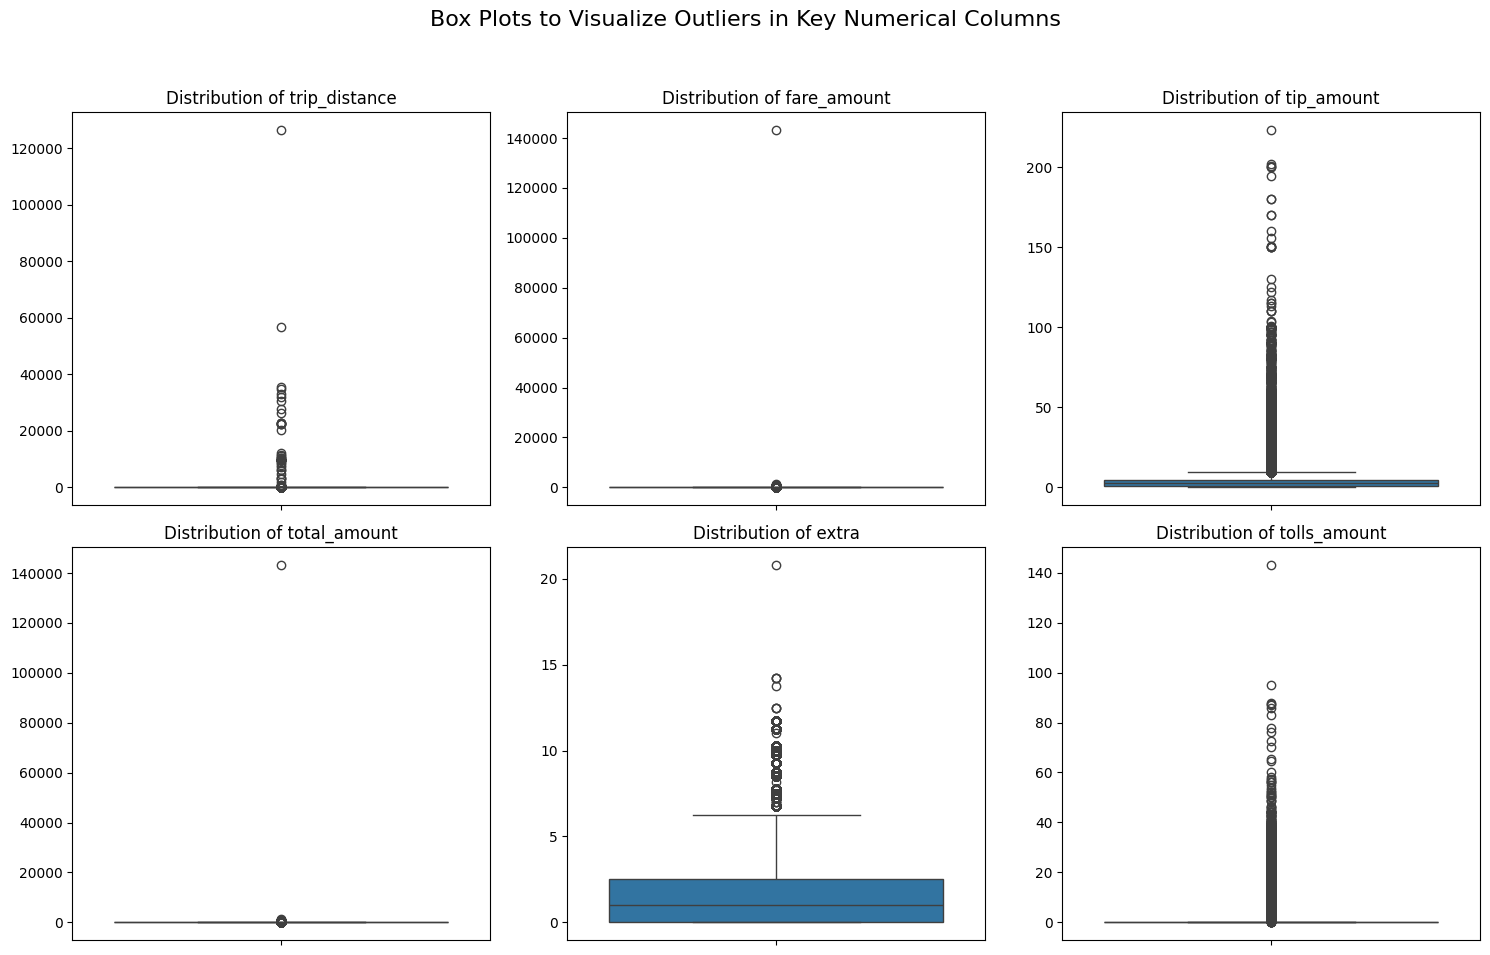

In [ ]:
# Check for potential out of place values in various columns
columns_to_visualize = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'extra', 'tolls_amount']

plt.figure(figsize=(15, 10))
plt.suptitle("Box Plots to Visualize Outliers in Key Numerical Columns", fontsize=16)

for i, col_name in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col_name])
    plt.title(f'Distribution of {col_name}')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
print("Passenger count distribution before removing outliers:")
print(df['passenger_count'].value_counts())

rows_before = len(df)
print(f"\nTotal rows before filtering: {rows_before}")

df = df[df['passenger_count'] <= 6]

print("\nPassenger count distribution after removing outliers:")
print(df['passenger_count'].value_counts())

rows_after = len(df)
print(f"\nTotal rows after filtering: {rows_after}")
print(f"Number of rows removed: {rows_before - rows_after}")

Passenger count distribution before removing outliers:
passenger_count
1.0    1442098
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

Total rows before filtering: 1896400

Passenger count distribution after removing outliers:
passenger_count
1.0    1442098
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
Name: count, dtype: int64

Total rows after filtering: 1896379
Number of rows removed: 21


In [ ]:
# Continue with outlier handling
rows_before_outlier_removal = len(df)
print(f"Number of rows before applying detailed outlier filters: {rows_before_outlier_removal}")

condition1 = ~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))
condition2 = ~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))
condition3 = df['trip_distance'] <= 250
condition4 = df['payment_type'] != 0

df = df[condition1 & condition2 & condition3 & condition4]

rows_after_outlier_removal = len(df)
print(f"Number of rows after applying detailed outlier filters: {rows_after_outlier_removal}")
print(f"Total number of outlier rows removed: {rows_before_outlier_removal - rows_after_outlier_removal}")

Number of rows before applying detailed outlier filters: 1896379
Number of rows after applying detailed outlier filters: 1831391
Total number of outlier rows removed: 64988


In [ ]:
# Do any columns need standardising?
print("Decision: No standardization is needed for Exploratory Data Analysis.")

Decision: No standardization is needed for Exploratory Data Analysis.


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

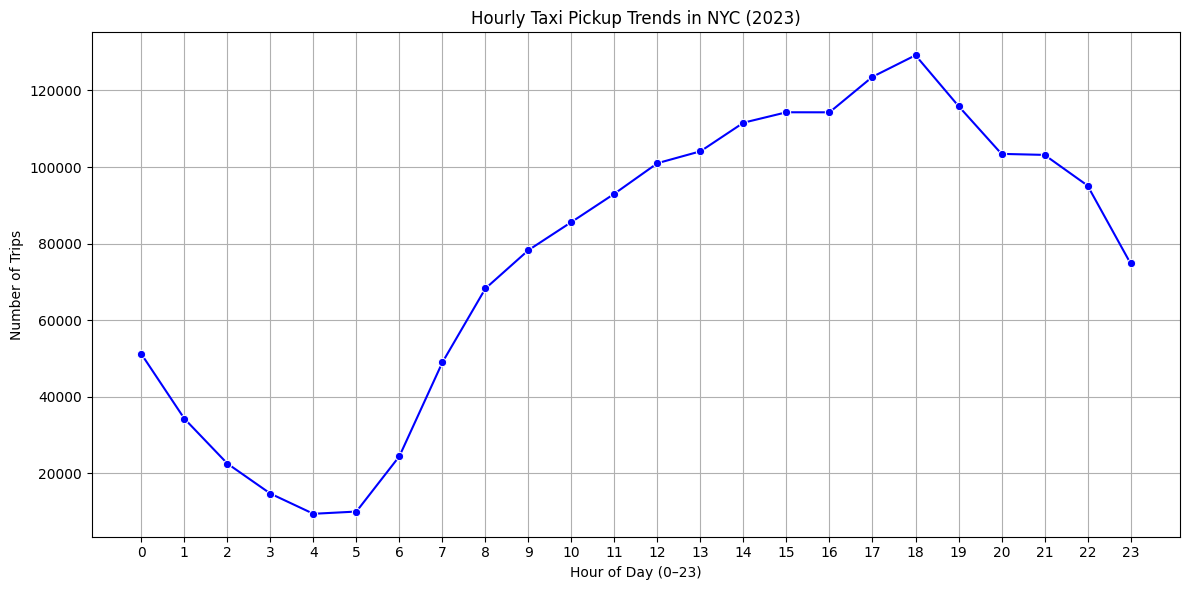

In [ ]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count', marker='o', color='b')
plt.title('Hourly Taxi Pickup Trends in NYC (2023)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

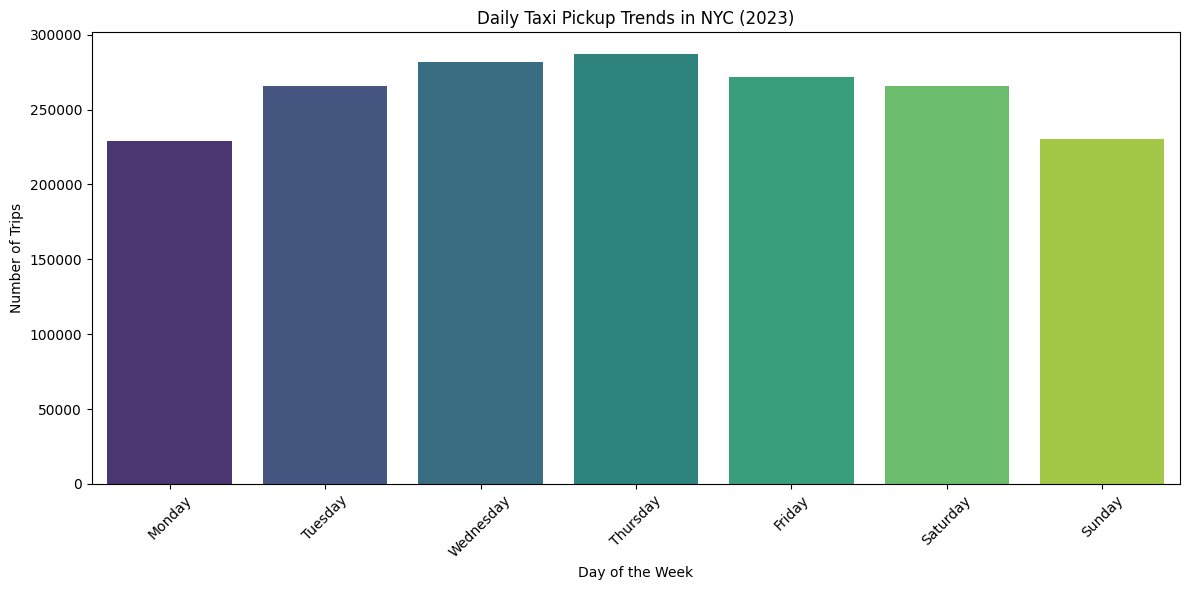

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

daily_trend = df.groupby('day_of_week').size().reset_index(name='pickup_count')

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_trend['day_of_week'] = pd.Categorical(daily_trend['day_of_week'], categories=day_order, ordered=True)
daily_trend = daily_trend.sort_values('day_of_week')

plt.figure(figsize=(12, 6))
sns.barplot(data=daily_trend, x='day_of_week', y='pickup_count', palette='viridis')
plt.title('Daily Taxi Pickup Trends in NYC (2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

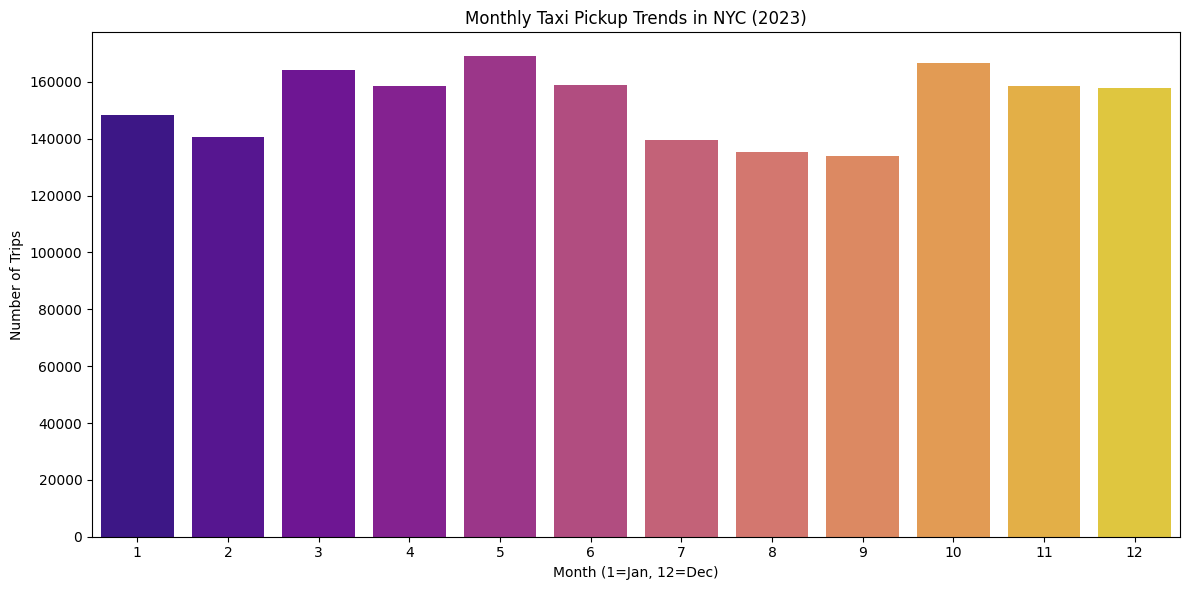

In [ ]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_trend = df.groupby('pickup_month').size().reset_index(name='pickup_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_trend, x='pickup_month', y='pickup_count', palette='plasma')
plt.title('Monthly Taxi Pickup Trends in NYC (2023)')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
columns_to_analyze = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

summary_df = pd.DataFrame(columns=columns_to_analyze)
summary_df.loc['Count of Zero Values'] = [(df[col] == 0).sum() for col in columns_to_analyze]
summary_df.loc['Count of Negative Values'] = [(df[col] < 0).sum() for col in columns_to_analyze]

print("Analysis of Zero and Negative Values in Key Columns:")
display(summary_df)

Analysis of Zero and Negative Values in Key Columns:


,fare_amount,tip_amount,total_amount,trip_distance
Count of Zero Values,575,410234,255,22928
Count of Negative Values,0,0,0,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
columns_to_filter = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

df_filtered = df.copy()

for col in columns_to_filter:
    df_filtered = df_filtered[df_filtered[col] > 0]

print(f"Number of rows in the original DataFrame 'df': {len(df)}")
print(f"Number of rows in the new 'df_filtered' DataFrame: {len(df_filtered)}")
print(f"Number of rows removed: {len(df) - len(df_filtered)}")

Number of rows in the original DataFrame 'df': 1831391
Number of rows in the new 'df_filtered' DataFrame: 1412905
Number of rows removed: 418486


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

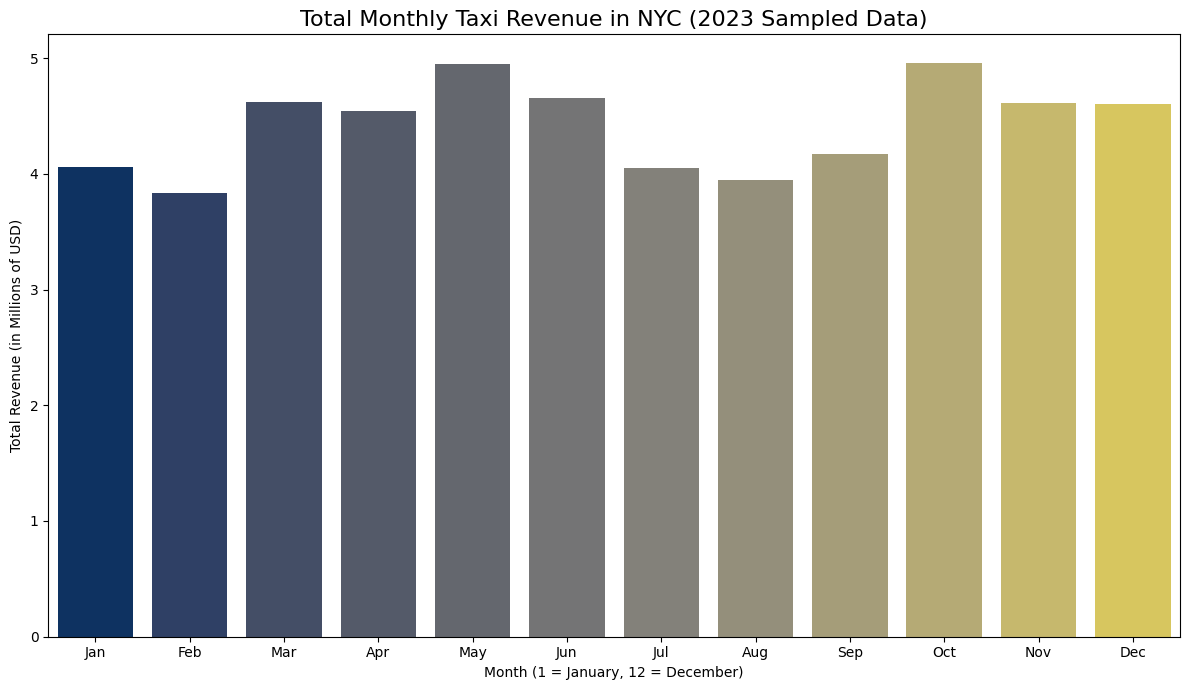

In [ ]:
# Group data by month and analyse monthly revenue
df['month'] = df['tpep_pickup_datetime'].dt.month

monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index()

# For better readability in the plot, we are converting the large revenue numbers to millions of dollars
monthly_revenue['total_amount_millions'] = monthly_revenue['total_amount'] / 1_000_000

plt.figure(figsize=(12, 7))
sns.barplot(data=monthly_revenue, x='month', y='total_amount_millions', palette='cividis')

plt.title('Total Monthly Taxi Revenue in NYC (2023 Sampled Data)', fontsize=16)
plt.xlabel('Month (1 = January, 12 = December)')
plt.ylabel('Total Revenue (in Millions of USD)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

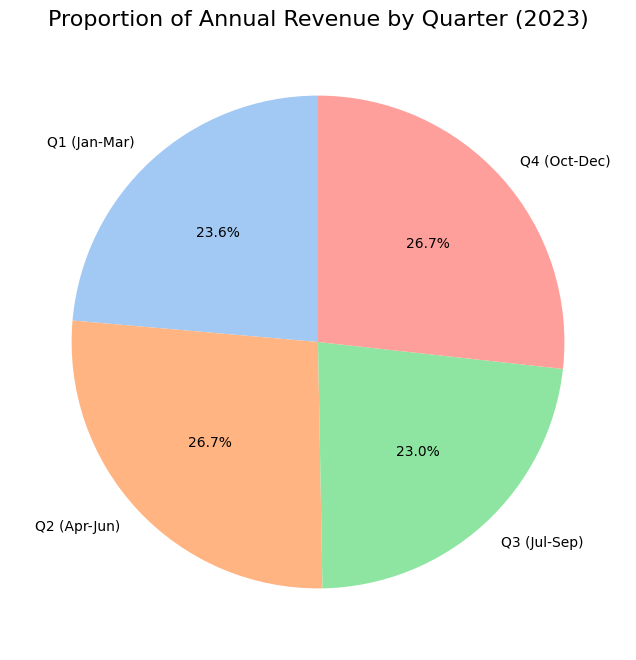

In [ ]:
# Calculate proportion of each quarter
def get_quarter(month):
    if month <= 3:
        return 'Q1 (Jan-Mar)'
    elif month <= 6:
        return 'Q2 (Apr-Jun)'
    elif month <= 9:
        return 'Q3 (Jul-Sep)'
    else:
        return 'Q4 (Oct-Dec)'

df['quarter'] = df['month'].apply(get_quarter)

# Calculate quarterly revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate total annual revenue
total_annual_revenue = quarterly_revenue['total_amount'].sum()

quarterly_revenue['proportion_percentage'] = (quarterly_revenue['total_amount'] / total_annual_revenue) * 100

plt.figure(figsize=(10, 8))
plt.pie(
    quarterly_revenue['proportion_percentage'],
    labels=quarterly_revenue['quarter'],
    autopct='%1.1f%%',  # This formats the percentage to one decimal place
    startangle=90,      # Rotates the pie chart to start at the top
    colors=sns.color_palette('pastel') # Use a nice color palette
)

plt.title('Proportion of Annual Revenue by Quarter (2023)', fontsize=16)
plt.ylabel('') # Hides the 'proportion_percentage' label on the y-axis for a cleaner look
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

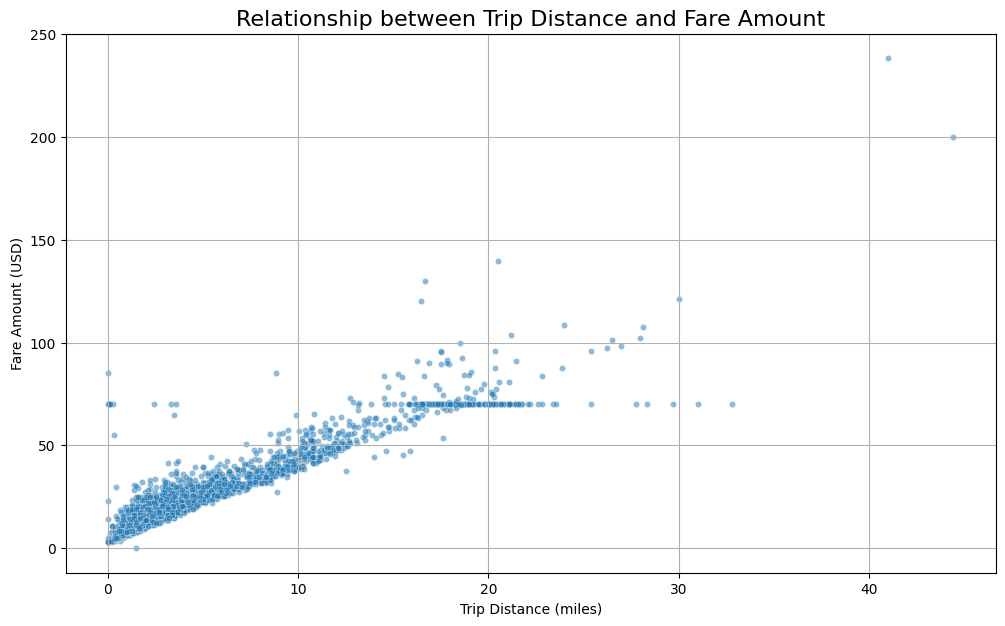

Correlation between Trip Distance and Fare Amount: 0.16


In [ ]:
# Show how trip fare is affected by distance
fare_distance_df = df[df['trip_distance'] > 0]

plt.figure(figsize=(12, 7))
# To avoid overplotting with too many data points, we will plot a random sample of 5000 trips
# This will make the underlying trend much easier to see
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=fare_distance_df.sample(n=5000, random_state=42), # Taking a random sample
    alpha=0.5,
    s=20 # Making the points a bit smaller
)

plt.title('Relationship between Trip Distance and Fare Amount', fontsize=16)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

correlation_value = fare_distance_df['trip_distance'].corr(fare_distance_df['fare_amount'])

print(f"Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

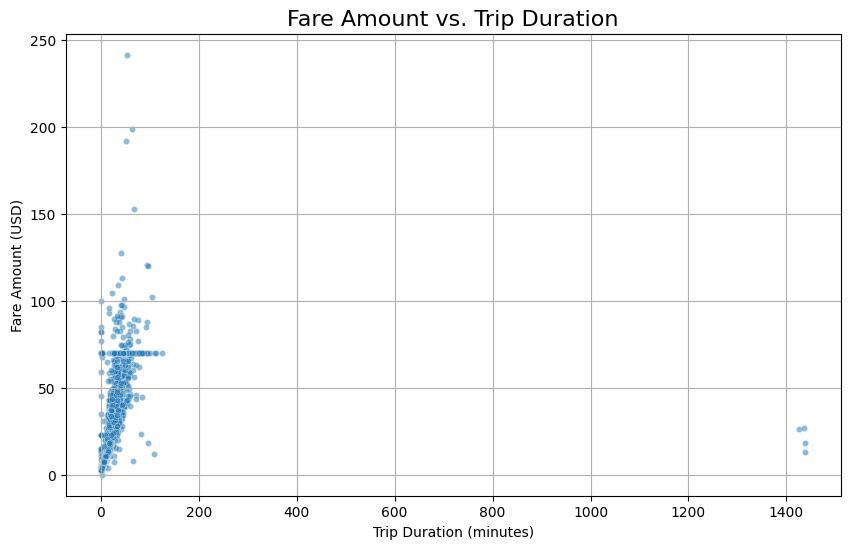

Correlation between Trip Duration and Fare Amount: 0.04



In [ ]:
# Show relationship between fare and trip duration
if 'trip_duration' not in df.columns:
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df.sample(5000, random_state=1), x='trip_duration', y='fare_amount', alpha=0.5, s=20)
plt.title('Fare Amount vs. Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

correlation_duration_fare = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between Trip Duration and Fare Amount: {correlation_duration_fare:.2f}\n")

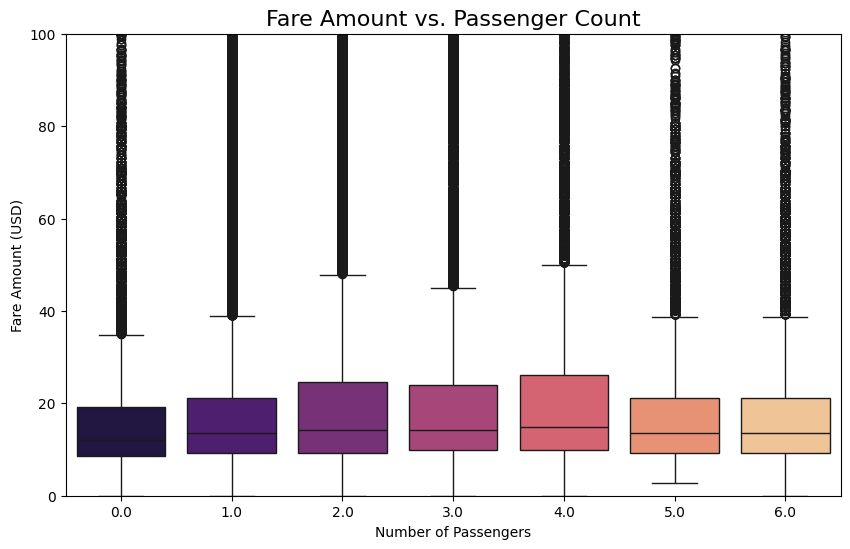

Correlation between Passenger Count and Fare Amount: 0.01



In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='magma')
plt.title('Fare Amount vs. Passenger Count', fontsize=16)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount (USD)')
# We can set a y-limit to zoom in on the main distribution and exclude extreme outliers for a clearer plot.
plt.ylim(0, 100)
plt.show()

correlation_passengers_fare = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between Passenger Count and Fare Amount: {correlation_passengers_fare:.2f}\n")

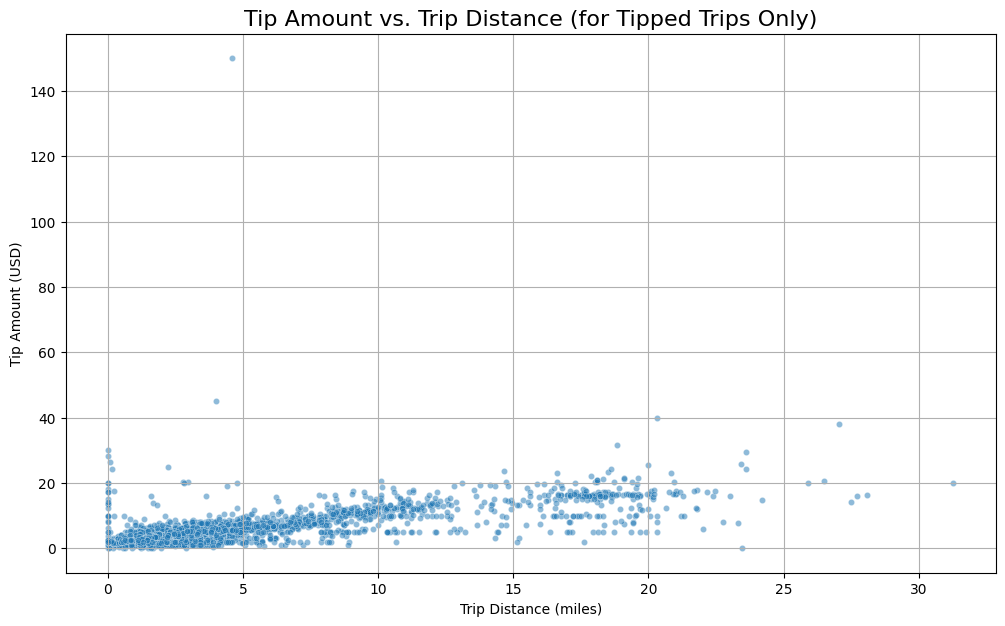

Correlation between Trip Distance and Tip Amount (for trips with tips): 0.77


In [ ]:
# Show relationship between tip and trip distance
df_filtered = df[df['tip_amount'] > 0]

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_filtered.sample(5000, random_state=42),
    x='trip_distance',
    y='tip_amount',
    alpha=0.5,
    s=20
)

plt.title('Tip Amount vs. Trip Distance (for Tipped Trips Only)', fontsize=16)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.grid(True)
plt.show()

correlation_tip_distance = df_filtered['trip_distance'].corr(df_filtered['tip_amount'])

print(f"Correlation between Trip Distance and Tip Amount (for trips with tips): {correlation_tip_distance:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

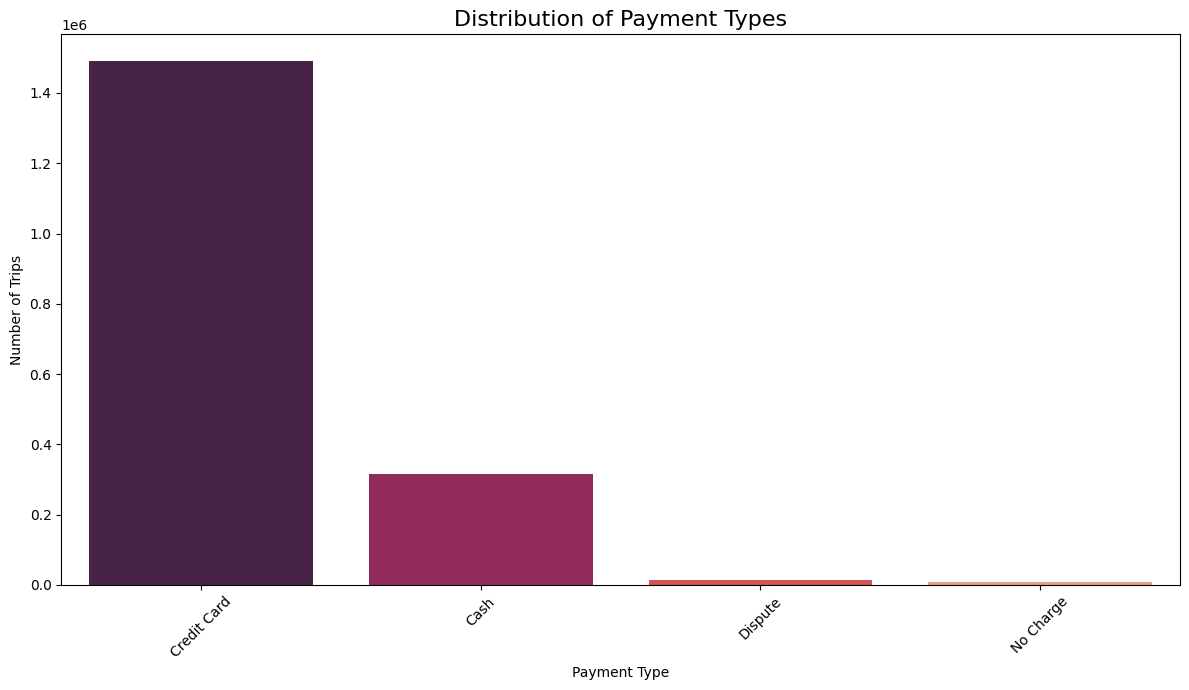

Percentage of Trips by Payment Type:
payment_type_label
Credit Card    81.48
Cash           17.28
Dispute         0.75
No Charge       0.49
Name: count, dtype: float64


In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Map the numerical payment_type to the labels
df['payment_type_label'] = df['payment_type'].map(payment_type_mapping)

payment_counts = df['payment_type_label'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='rocket')

plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45) # Rotating labels for better readability
plt.tight_layout()
plt.show()

payment_percentages = (payment_counts / payment_counts.sum()) * 100

print("Percentage of Trips by Payment Type:")
print(payment_percentages.round(2))

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('data/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

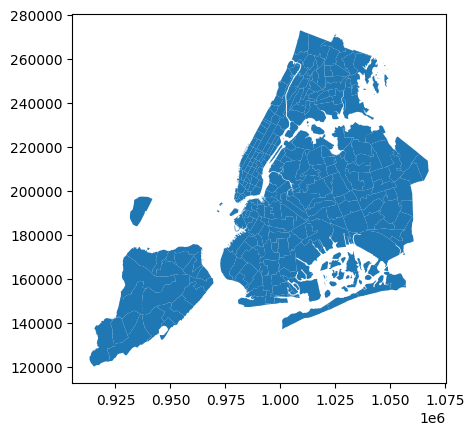

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined,pickup_hour,pickup_month,day_of_week,month,quarter,trip_duration,payment_type_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,0,1,Sunday,1,Q1 (Jan-Mar),15.950000,Cash,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,0,1,Sunday,1,Q1 (Jan-Mar),5.083333,Credit Card,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.4,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,0,1,Sunday,1,Q1 (Jan-Mar),10.550000,Cash,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.5,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,0,1,Sunday,1,Q1 (Jan-Mar),5.416667,Cash,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,246,37,1,34.5,3.5,0.5,7.90,0.0,1.0,47.40,2.5,0.00,0,1,Sunday,1,Q1 (Jan-Mar),33.616667,Credit Card,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
pickup_counts_by_id = merged_df.groupby('PULocationID').size().reset_index(name='trip_count')

print("Trip Counts by Location ID:")
display(pickup_counts_by_id.head())

pickup_counts_by_name = merged_df.groupby('zone').size().reset_index(name='trip_count')

busiest_zones = pickup_counts_by_name.sort_values(by='trip_count', ascending=False)

print("\nTop 10 Busiest Pickup Zones by Name:")
display(busiest_zones.head(10))

Trip Counts by Location ID:


,PULocationID,trip_count
0,1,214
1,2,2
2,3,40
3,4,1861
4,5,13



Top 10 Busiest Pickup Zones by Name:


,zone,trip_count
119,JFK Airport,96827
228,Upper East Side South,86905
152,Midtown Center,85948
227,Upper East Side North,77517
153,Midtown East,65634
129,LaGuardia Airport,64177
177,Penn Station/Madison Sq West,63471
221,Times Sq/Theatre District,61315
133,Lincoln Square East,60887
161,Murray Hill,54493


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
pickup_counts_by_id.rename(columns={'trip_count': 'num_pickups'}, inplace=True)

zones_with_trips = zones.merge(
    pickup_counts_by_id,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

zones_with_trips.drop(columns=['PULocationID'], inplace=True, errors='ignore')

zones_with_trips['num_pickups'].fillna(0, inplace=True)
zones_with_trips['num_pickups'] = zones_with_trips['num_pickups'].astype(int)

print("Successfully merged trip counts into the GeoDataFrame.")
print("Displaying the first 5 rows with the new 'num_pickups' column:")
display(zones_with_trips.head())

Successfully merged trip counts into the GeoDataFrame.
Displaying the first 5 rows with the new 'num_pickups' column:


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,num_pickups
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",214
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",40
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1861
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",13


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

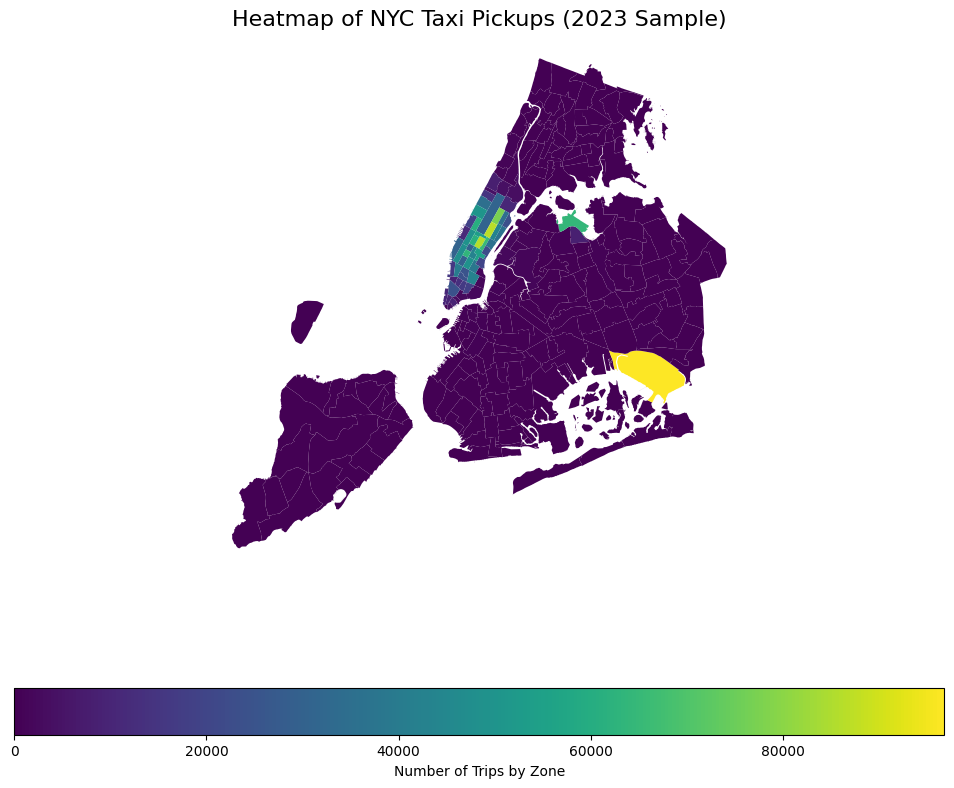

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='num_pickups',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips by Zone",
        'orientation': "horizontal"
    },
    cmap='viridis'
)

ax.set_title("Heatmap of NYC Taxi Pickups (2023 Sample)", fontsize=16)
plt.axis('off')

plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sorted = zones_with_trips.sort_values(by='num_pickups', ascending=False)

# Displaying the top 10 busiest zones to get a clear view of the most popular areas.
print("Top 10 Busiest Taxi Zones by Number of Pickups:")
display(zones_with_trips_sorted[['zone', 'borough', 'num_pickups']].head(10))

Top 10 Busiest Taxi Zones by Number of Pickups:


,zone,borough,num_pickups
131,JFK Airport,Queens,96827
236,Upper East Side South,Manhattan,86905
160,Midtown Center,Manhattan,85948
235,Upper East Side North,Manhattan,77517
161,Midtown East,Manhattan,65634
137,LaGuardia Airport,Queens,64177
185,Penn Station/Madison Sq West,Manhattan,63471
229,Times Sq/Theatre District,Manhattan,61315
141,Lincoln Square East,Manhattan,60887
169,Murray Hill,Manhattan,54493


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour

grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']

slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)

slowest_routes_with_names = slowest_routes.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'})

slowest_routes_with_names = slowest_routes_with_names.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'})

print("Top 10 Slowest Routes (by Average Speed):")

display_columns = [
    'pickup_zone',
    'dropoff_zone',
    'pickup_hour',
    'avg_speed_mph'
]
print(slowest_routes_with_names[display_columns])

Top 10 Slowest Routes (by Average Speed):
                pickup_zone                       dropoff_zone  pickup_hour  \
0   Two Bridges/Seward Park        Downtown Brooklyn/MetroTech           13   
1  Washington Heights North                                NaN           17   
2       Lincoln Square East                Lincoln Square East            5   
3                 Woodhaven                          Woodhaven            1   
4          Garment District                            Astoria            8   
5           Carroll Gardens        Downtown Brooklyn/MetroTech           21   
6   Greenwich Village North  University Heights/Morris Heights           22   
7           Randalls Island                    Randalls Island           16   
8                 Sunnyside     Long Island City/Hunters Point           18   
9                 Chinatown                          Chinatown           10   

   avg_speed_mph  
0       0.005324  
1       0.007772  
2       0.023770  
3       0.02

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

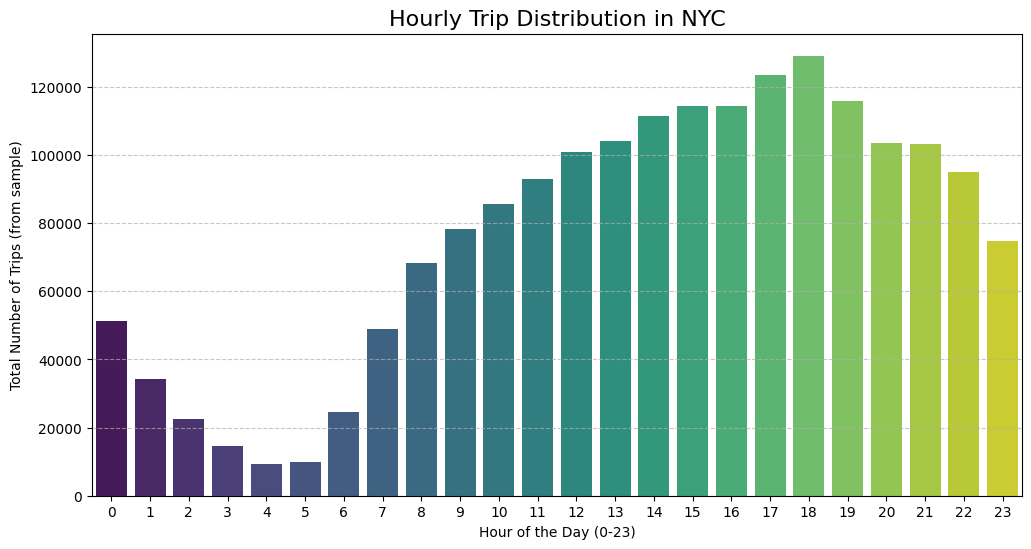

Busiest hour: 18
Number of trips during busiest hour (from sample): 129190


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

plt.figure(figsize=(12, 6))
sns.barplot(
    x='pickup_hour',
    y='trip_count',
    data=hourly_trips,
    palette='viridis'
)

plt.title('Hourly Trip Distribution in NYC', fontsize=16)
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Total Number of Trips (from sample)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Busiest hour: {int(busiest_hour['pickup_hour'])}")
print(f"Number of trips during busiest hour (from sample): {busiest_hour['trip_count']}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Use the 'trip_count' column from the 'hourly_trips' DataFrame
top5_sampled_hours = hourly_trips.sort_values(by='trip_count', ascending=False).head(5)

estimated_actual_trips = (top5_sampled_hours['trip_count'] / sample_fraction).astype(int)

top5_summary_df = pd.DataFrame({
    'Sampled Trips': top5_sampled_hours['trip_count'],
    'Estimated Actual Trips': estimated_actual_trips
})

print("Estimated Actual Number of Trips in the Five Busiest Hours:")
print(top5_summary_df)

Estimated Actual Number of Trips in the Five Busiest Hours:
    Sampled Trips  Estimated Actual Trips
18         129190                 2583800
17         123563                 2471260
19         115920                 2318400
15         114301                 2286020
16         114289                 2285780


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

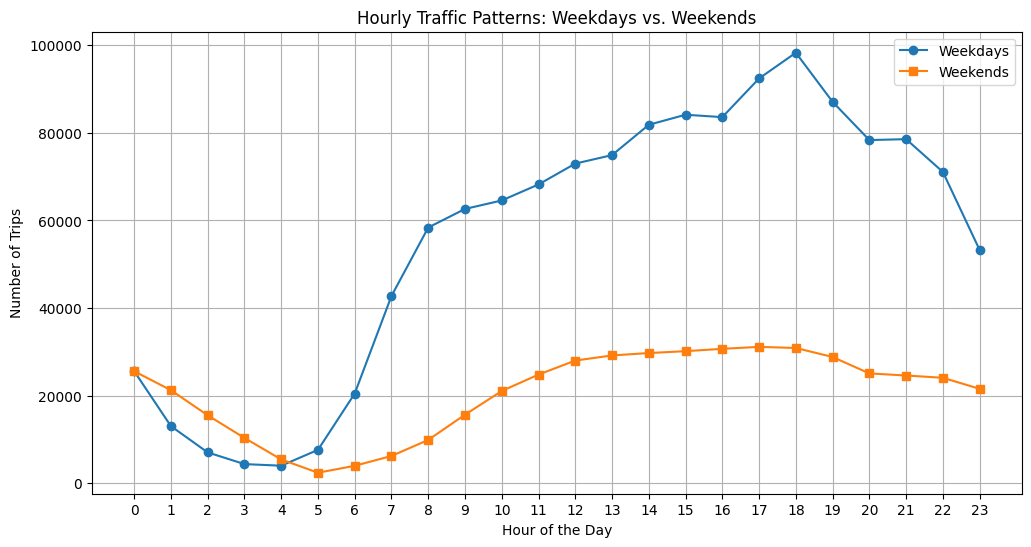

In [ ]:
# Compare traffic trends for the week days and weekends
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df[df['day_of_week'] < 5]  # Monday to Friday
weekends_df = df[df['day_of_week'] >= 5]  # Saturday and Sunday
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
# Counting pickups by location ID with new variable names
top_pickup_zones = df['PULocationID'].value_counts().head(10).reset_index()
top_pickup_zones.columns = ['LocationID', 'Pickup_Trip_Count']

# Merging with zones to get zone names using new variable names
top_pickup_zones = top_pickup_zones.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
print(top_pickup_zones)

# Counting dropoffs by location ID with updated variable names
top_dropoff_zones = df['DOLocationID'].value_counts().head(10).reset_index()
top_dropoff_zones.columns = ['LocationID', 'Dropoff_Trip_Count']

# Merging with zones to get zone names
top_dropoff_zones = top_dropoff_zones.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones:")
print(top_dropoff_zones
)

Top 10 Pickup Zones:
   LocationID  Pickup_Trip_Count                          zone
0         132              96827                   JFK Airport
1         237              86905         Upper East Side South
2         161              85948                Midtown Center
3         236              77517         Upper East Side North
4         162              65634                  Midtown East
5         138              64177             LaGuardia Airport
6         186              63471  Penn Station/Madison Sq West
7         230              61315     Times Sq/Theatre District
8         142              60887           Lincoln Square East
9         170              54493                   Murray Hill
Top 10 Dropoff Zones:
   LocationID  Dropoff_Trip_Count                       zone
0         236               81269      Upper East Side North
1         237               77558      Upper East Side South
2         161               71647             Midtown Center
3         230       

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_location_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_location_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

ratio_df = pd.concat([pickup_location_counts, dropoff_location_counts], axis=1).fillna(0)
ratio_df['pickup_dropoff_ratio'] = ratio_df['pickup_count'] / ratio_df['dropoff_count'].replace(0, np.nan)
ratio_df = ratio_df.reset_index().rename(columns={'index': 'LocationID'})
ratio_df = ratio_df.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratio_df = ratio_df.set_index('zone')

pickup_dropoff_ratio_series = ratio_df['pickup_dropoff_ratio']
top_ratio_series = pickup_dropoff_ratio_series.sort_values(ascending=False).head(10)
bottom_ratio_series = pickup_dropoff_ratio_series.sort_values().head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_ratio_series)
print("Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_ratio_series)

Top 10 Pickup/Dropoff Ratios:
zone
East Elmhurst                   8.320717
JFK Airport                     4.617626
LaGuardia Airport               2.884489
Penn Station/Madison Sq West    1.582187
Central Park                    1.374760
Greenwich Village South         1.374743
West Village                    1.326222
Midtown East                    1.256201
Midtown Center                  1.199604
Garment District                1.191880
Name: pickup_dropoff_ratio, dtype: float64
Bottom 10 Pickup/Dropoff Ratios:
zone
Freshkills Park                        0.000000
Broad Channel                          0.000000
West Brighton                          0.000000
Oakwood                                0.000000
Breezy Point/Fort Tilden/Riis Beach    0.025641
Stapleton                              0.029412
Windsor Terrace                        0.038259
Newark Airport                         0.040233
Grymes Hill/Clifton                    0.043478
Ridgewood                              0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
nighttime_rides_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]

# Merging to attach pickup zone names
nighttime_rides_df = nighttime_rides_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# Merging to attach dropoff zone names
nighttime_rides_df = nighttime_rides_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

# Aggregating and sort rides to get top 10 pickup and dropoff zones during nighttime
top_night_pickup_zones = nighttime_rides_df.groupby('pickup_zone')['PULocationID'] \
                                            .count() \
                                            .sort_values(ascending=False) \
                                            .head(10)
top_night_dropoff_zones = nighttime_rides_df.groupby('dropoff_zone')['DOLocationID'] \
                                             .count() \
                                             .sort_values(ascending=False) \
                                             .head(10)

print("Top 10 Nighttime Pickup Zones:")
print(top_night_pickup_zones)
print("\nTop 10 Nighttime Dropoff Zones:")
print(top_night_dropoff_zones)

Top 10 Nighttime Pickup Zones:
pickup_zone
East Village                    15339
JFK Airport                     13399
West Village                    12352
Clinton East                     9797
Lower East Side                  9535
Greenwich Village South          8720
Times Sq/Theatre District        7776
Penn Station/Madison Sq West     6233
Midtown South                    5962
LaGuardia Airport                5947
Name: PULocationID, dtype: int64

Top 10 Nighttime Dropoff Zones:
dropoff_zone
East Village                 8239
Clinton East                 6641
Murray Hill                  6085
Gramercy                     5627
East Chelsea                 5551
Lenox Hill West              5122
West Village                 4896
Yorkville West               4878
Lower East Side              4321
Times Sq/Theatre District    4297
Name: DOLocationID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Extracting pickup hour from the pickup datetime
df['pickup_time_hour'] = df['tpep_pickup_datetime'].dt.hour

# Defining nighttime (11 PM to 5 AM) and daytime (6 AM to 10 PM) rides
nighttime_rides_df = df[(df['pickup_time_hour'] >= 23) | (df['pickup_time_hour'] <= 5)]  # 11 PM - 5 AM
daytime_rides_df = df[(df['pickup_time_hour'] >= 6) & (df['pickup_time_hour'] <= 22)]   # 6 AM - 10 PM

# Calculating revenue totals for nighttime and daytime
night_total_revenue = nighttime_rides_df['total_amount'].sum()
day_total_revenue = daytime_rides_df['total_amount'].sum()
overall_total_revenue = df['total_amount'].sum()

# Computing revenue share percentages
night_revenue_percentage = (night_total_revenue / overall_total_revenue) * 100
day_revenue_percentage = (day_total_revenue / overall_total_revenue) * 100

# Displaying the results
print(f"Nighttime Revenue Share: {night_revenue_percentage:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_percentage:.2f}%")

Nighttime Revenue Share: 12.06%
Daytime Revenue Share: 87.94%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
# Filtering rides with valid trip distances and passenger counts
valid_rides_df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Computing fare rate per mile per passenger
valid_rides_df['fare_rate'] = valid_rides_df['total_amount'] / (valid_rides_df['trip_distance'] * valid_rides_df['passenger_count'])

# Calculating the average fare rate for different passenger counts
avg_fare_rate_by_passenger = valid_rides_df.groupby('passenger_count')['fare_rate'].mean()
print(avg_fare_rate_by_passenger)

passenger_count
1.0    16.895938
2.0     9.303877
3.0     5.806031
4.0     5.939205
5.0     2.750472
6.0     2.217768
Name: fare_rate, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
# Filtering trips with valid distances and fare amounts
filtered_trips_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)].copy()

# Adding columns for day of week and hour of pickup
filtered_trips_df['weekday'] = filtered_trips_df['tpep_pickup_datetime'].dt.day_name()
filtered_trips_df['pickup_hour'] = filtered_trips_df['tpep_pickup_datetime'].dt.hour

# Computing fare per mile
filtered_trips_df['fare_rate_per_mile'] = filtered_trips_df['total_amount'] / filtered_trips_df['trip_distance']

# Calculating average fare rate by day
average_fare_by_day = filtered_trips_df.groupby('weekday')['fare_rate_per_mile'].mean().round(2)

# Calculating average fare rate by hour
average_fare_by_hour = filtered_trips_df.groupby('pickup_hour')['fare_rate_per_mile'].mean().round(2)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_fare_by_day = average_fare_by_day.reindex(days_order)

print(average_fare_by_day)
print(average_fare_by_hour)

weekday
Monday       16.77
Tuesday      18.24
Wednesday    17.12
Thursday     17.29
Friday       16.88
Saturday     16.25
Sunday       17.94
Name: fare_rate_per_mile, dtype: float64
pickup_hour
0     15.67
1     16.96
2     15.55
3     16.76
4     19.83
5     19.68
6     16.02
7     15.04
8     15.44
9     15.53
10    18.21
11    16.34
12    17.44
13    17.37
14    16.92
15    18.03
16    21.45
17    19.15
18    18.65
19    18.75
20    15.12
21    14.83
22    15.45
23    15.90
Name: fare_rate_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

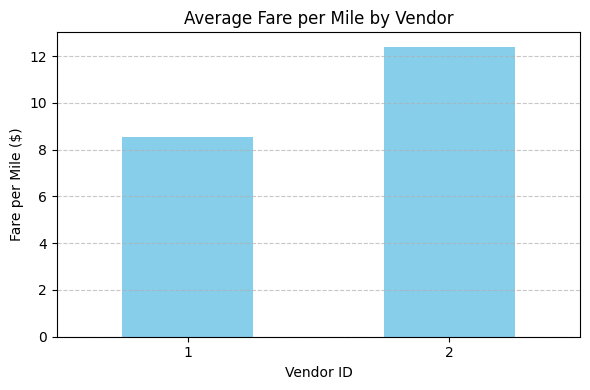

In [ ]:
# Compare fare per mile for different vendors
valid_trip_df = df[df['trip_distance'] > 0].copy()
valid_trip_df['fare_rate_per_mile'] = valid_trip_df['fare_amount'] / valid_trip_df['trip_distance']

avg_fare_by_vendor = valid_trip_df.groupby('VendorID')['fare_rate_per_mile'].mean().sort_values()

avg_fare_by_vendor.plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


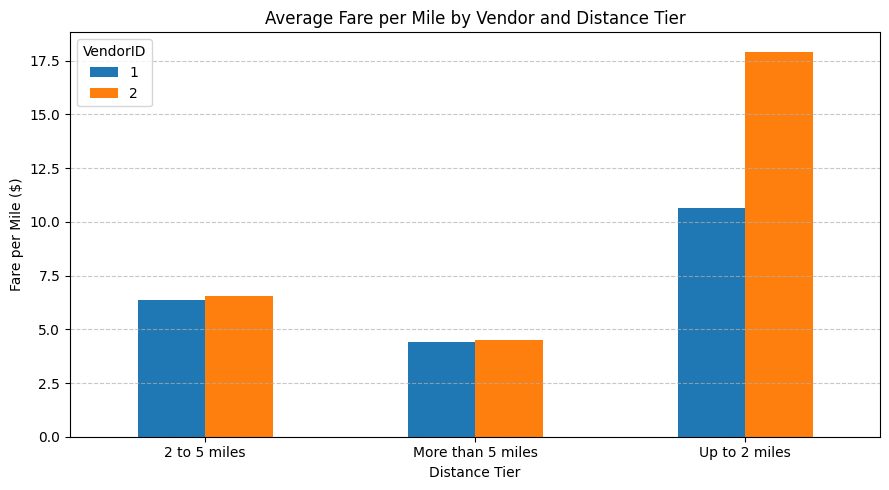

In [ ]:
# Defining distance tiers
fare_df = df[df['trip_distance'] > 0].copy()
fare_df['fare_per_mile'] = fare_df['fare_amount'] / fare_df['trip_distance']

short_distance_df = fare_df[fare_df['trip_distance'] <= 2].copy()
medium_distance_df = fare_df[(fare_df['trip_distance'] > 2) & (fare_df['trip_distance'] <= 5)].copy()
long_distance_df = fare_df[fare_df['trip_distance'] > 5].copy()

short_distance_df['distance_tier'] = 'Up to 2 miles'
medium_distance_df['distance_tier'] = '2 to 5 miles'
long_distance_df['distance_tier'] = 'More than 5 miles'

tiered_fares_df = pd.concat([short_distance_df, medium_distance_df, long_distance_df])

avg_fare_by_tier_vendor = tiered_fares_df.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier_vendor.plot(kind='bar', figsize=(9, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100

tip_analysis_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

tip_analysis_df['pickup_hour_val'] = tip_analysis_df['pickup_hour']

tip_analysis_df['distance_group'] = pd.cut(
    tip_analysis_df['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

tip_analysis_df['passenger_group'] = pd.cut(
    tip_analysis_df['passenger_count'],
    bins=[0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

tip_analysis_df['time_group'] = pd.cut(
    tip_analysis_df['pickup_hour_val'],
    bins=[0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)

print("Average Tip Percentage by Distance:")
print(tip_analysis_df.groupby('distance_group')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tip_analysis_df.groupby('passenger_group')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tip_analysis_df.groupby('time_group')['tip_percentage'].mean())

low_tip_df = tip_analysis_df[tip_analysis_df['tip_percentage'] < 10]
print("\nMost Common Low Tip Scenarios:")
print(low_tip_df.groupby(['distance_group', 'passenger_group', 'time_group'])
                .size()
                .sort_values(ascending=False)
                .head(10))

distance_bins = [0, 1, 2, 5, 10, 20, 50]
tip_analysis_df['distance_range'] = pd.cut(tip_analysis_df['trip_distance'], bins=distance_bins)

avg_tip_by_distance = tip_analysis_df.groupby('distance_range')['tip_percentage'].mean()
avg_tip_by_distance

Average Tip Percentage by Distance:
distance_group
Up to 2 miles        12.144307
2 to 5 miles         12.289765
More than 5 miles    11.307092
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_group
1 passenger       12.100453
2-3 passengers    11.660019
4+ passengers     11.302149
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_group
Midnight to 6 AM    11.598390
6 AM to Noon        11.810100
Noon to 6 PM        11.785420
6 PM to Midnight    12.357375
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_group     passenger_group  time_group      
Up to 2 miles      1 passenger      Noon to 6 PM        97300
                                    6 PM to Midnight    72158
                                    6 AM to Noon        60658
2 to 5 miles       1 passenger      Noon to 6 PM        40091
                                    6 PM to Midnight    39520
                                

,tip_percentage
distance_range,
"(0, 1]",11.859483
"(1, 2]",12.339685
"(2, 5]",12.289765
"(5, 10]",11.555761
"(10, 20]",11.177645
"(20, 50]",10.352858


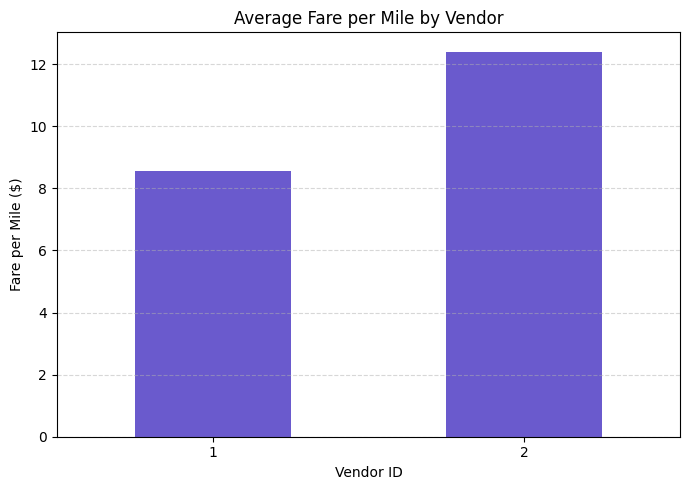

In [ ]:
valid_df = df[df['trip_distance'] > 0].copy()

valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

vendor_fare_metric = valid_df.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_metric.plot(kind='bar', color='slateblue', figsize=(7, 5))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

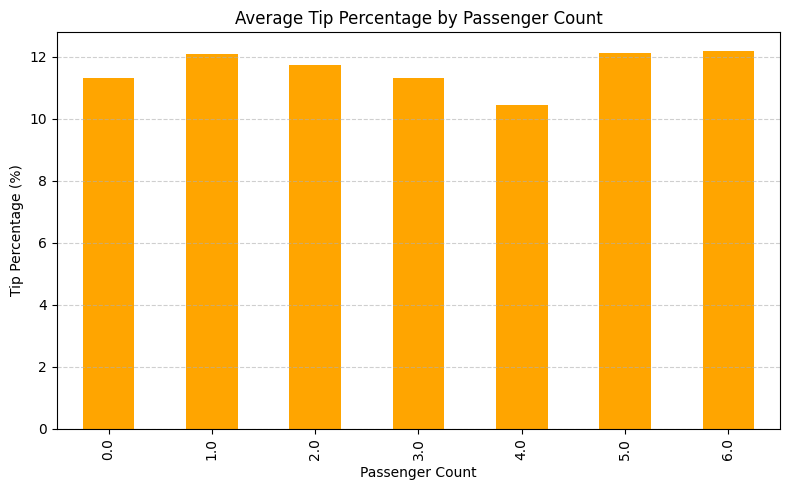

In [ ]:
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean()

tip_by_passenger.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

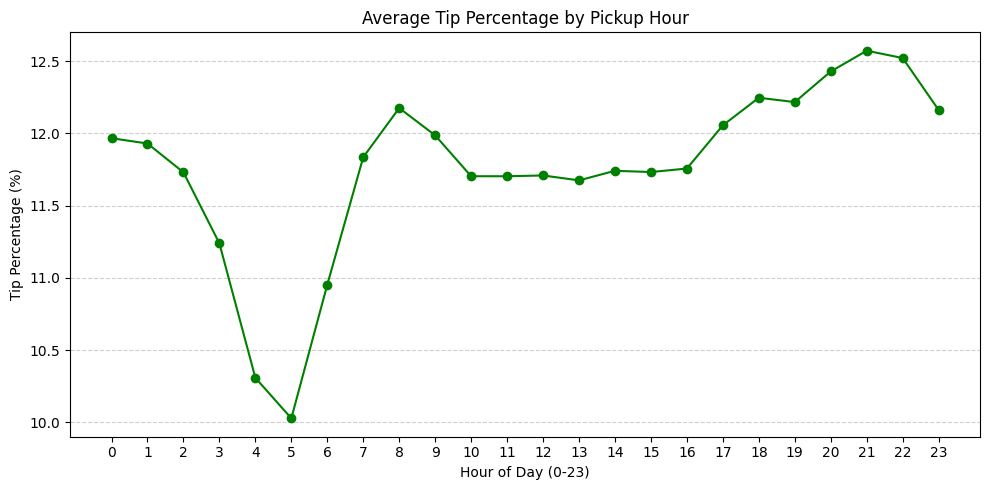

In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

avg_tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

avg_tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='green')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100

low_tip_trips = df[df['tip_percent'] < 10].copy()
high_tip_trips = df[df['tip_percent'] > 25].copy()

comparison_metrics = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['passenger_count'].mean(),
        low_tip_trips['fare_amount'].mean(),
        low_tip_trips['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['passenger_count'].mean(),
        high_tip_trips['fare_amount'].mean(),
        high_tip_trips['tip_amount'].mean()
    ]
}, index=[
    'Avg Trip Distance',
    'Avg Passenger Count',
    'Avg Fare Amount',
    'Avg Tip Amount'
])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison_metrics.round(2))

Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              3.79             2.29
Avg Passenger Count            1.41             1.35
Avg Fare Amount               21.91            14.43
Avg Tip Amount                 0.28             4.44


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

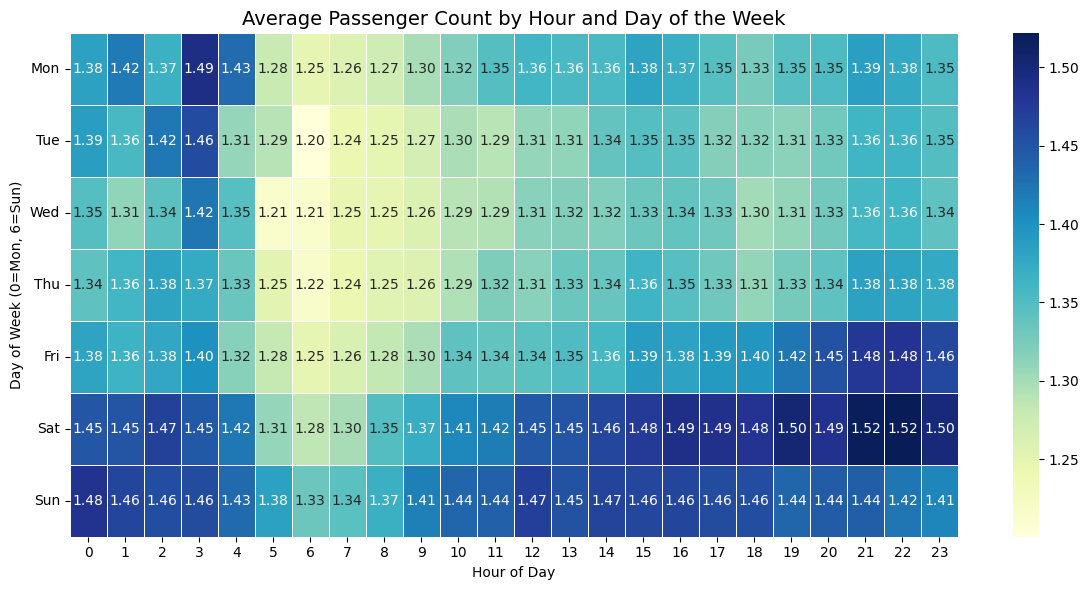

In [ ]:
# See how passenger count varies across hours and days
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')

plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

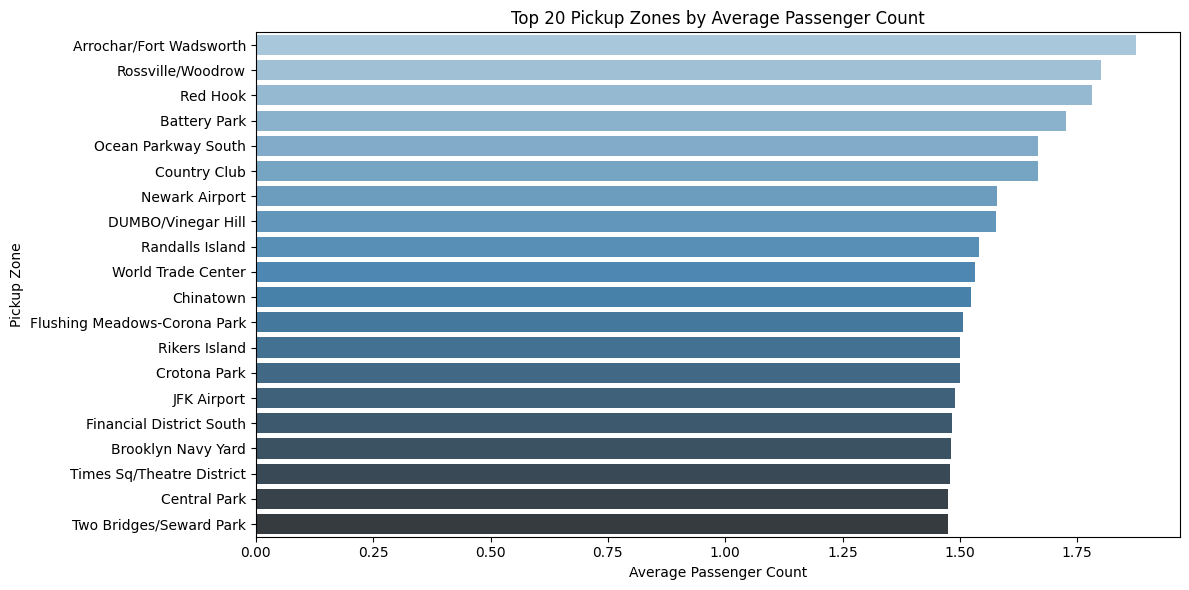

In [ ]:
# How does passenger count vary across zones
zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']],
                                              left_on='PULocationID',
                                              right_on='LocationID',
                                              how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zone_avg_passenger = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_avg_passenger.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

zones_with_trips = zones_with_trips.merge(zone_avg_passenger,
                                          left_on='LocationID',
                                          right_on='PULocationID',
                                          how='left')

zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,num_pickups,PULocationID,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",214,1.0,1.579439
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,2.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",40,3.0,1.025000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1861,4.0,1.409457
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",13,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                    61.942807
mta_tax                  99.070706
tip_amount               77.599868
tolls_amount              8.116399
improvement_surcharge    99.963798
congestion_surcharge     92.312455
airport_fee_combined      8.788402
dtype: float64


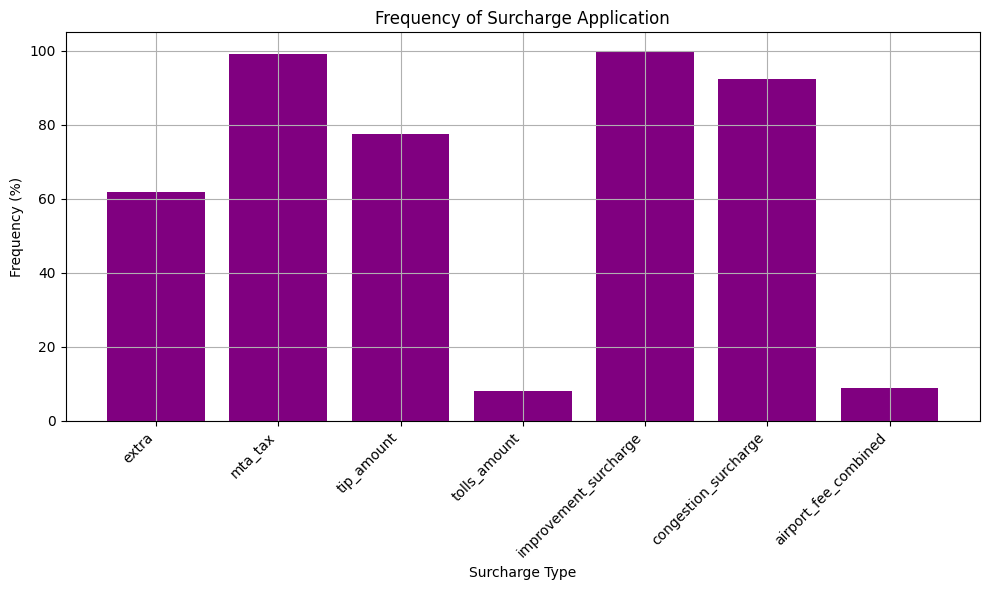

In [ ]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values, color='purple')
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##Key Insights

When people need rides: Most people want taxis during rush hours, weekends, and certain months. There’s a big jump at night in areas with bars and clubs.
Money stuff: The price of a ride goes up with distance and time. Sharing rides could make it cheaper. How much people tip might depend on how the trip goes.
Where rides are needed: Airports, busy areas, and famous places get lots of ride requests. Some spots have more pickups or drop-offs, not both. Nighttime is busy in places known for parties and fun.
Company differences: Some companies charge more than others. Extra fees show up a lot. Trips have different price levels for how far you go.

##Recommendations

**Demand**

Focus on busy places and popular times.
Make sure you have enough taxis in nightlife areas at night.
Set up options for groups and shared rides.

**Supply**

Have more taxis ready where and when people need them most.
Try raising prices when a lot of people need rides, or when trips take longer.
Help drivers move to areas with fewer taxis if they’re needed there.
Give bonuses or rewards to drivers who work in slow areas or off hours.

**Customer Experience**

Give drivers good training and check on service quality.
Let people pay in different ways.
Tell people about ride-sharing options.

**Keep Improving**

Watch how your taxis are working and keep changing your plan using data and rider feedback.
Work together with city leaders on problems.

**Conclusion**

When taxi companies understand when and where people need rides, they can plan better, send cars where they're needed, and help drivers do their best. If they use these simple ideas, taxis in NYC can help more people and give better service to everyone.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##Smart Cab Positioning Tips

**Adjust by time:** Put more taxis on the road during busy hours and cut back when it’s slow, like at midday or slower months.

**Think about the day:** On weekdays, send more taxis to business areas. On weekends, focus on places where people live or go to have fun. Remember to plan for big events at places like stadiums or concert halls.

**Know your zones:**Always keep lots of taxis in areas where you get lots of ride requests. If some spots have too many drop-offs and not enough pickups (or the other way around), send more taxis there. At night, make sure popular nightlife spots have enough cabs.

**Use data:** Look at real-time ride requests and predictions to decide where to send taxis. Use ride app info to help.

**Work together:** Keep in touch with your drivers and talk to the city when you need to change where taxis go.

**Use tech tools:** GPS, maps showing busy areas, and dashboards can help you see where taxis should go.

If taxi companies follow these ideas, they can put cabs in the right places at the right times, so riders wait less and drivers get more trips. This helps everyone get around the city more easily.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##How to Use Data for Better Taxi Pricing

**Change prices with demand:** Raise prices when lots of people need rides, like during busy hours or bad traffic. Offer lower prices or discounts when things are slow.

**Set prices by trip type:** Keep prices good for short rides so they’re not too expensive. For long trips, use different price levels, or charge more for some busy zones.

**Shared ride deals:** Let people save money by sharing cabs with others. Give group discounts to fill cars and help more riders.

**Smart surcharges:** Check how often extra fees are added. Charge peak time surcharges only when needed and always tell riders clearly about any extra costs.

**Check other companies:** Watch how much rivals charge and change your own prices as needed. Make sure to explain why you might cost more, like if you offer faster service or cleaner cars.

**Keep learning:** Keep an eye on your pricing and test new ideas. Use feedback and data to change prices so you earn more and keep riders happy.

If taxi companies use these tips, they can earn more money, keep up with the competition, and give riders a fair and smooth taxi experience.